# Predictive learning

## 1. Dataset exploration

In [1]:
# Imports for the task

from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import itertools

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data
targetNames = [0, 1]
headers = ["Free_parking",  # 0,1 (No/Yes)
           "Id_Parking",       
           "Time_zone",     # 0,1,2,3,4,5,6 (7:00-10:00,10:00-13:00,13:00-16:00,16:00-19:00,19:00-22:00,22:00-00:00,00:00-7:00)
           "Day_of_week",   # 0,1,2,3,4,5,6 (Monday, Tuesday, Wednesday...)
           "Working_day"    # 0,1 (No/Yes)
          ]

dataFrame = pd.read_csv("finalDataset.csv", header = None, sep=',', names = headers)

# Assign data and target to X, y variables to be used later on
npArray = dataFrame.values

# Obtain X excluding first column
idx_OUT_columns = [0]
idx_IN_columns = [i for i in range(np.shape(npArray)[1]) if i not in idx_OUT_columns]
X = npArray[:,idx_IN_columns]

# Obtain y
y = dataFrame['Free_parking'].values

In [3]:
# Show first sample data using pandas
dataFrame.head(10)

,Free_parking,Id_Parking,Time_zone,Day_of_week,Working_day
0,1,1,4,1,1
1,1,2,4,1,1
2,0,3,4,1,1
3,1,4,4,1,1
4,1,5,4,1,1
5,1,6,4,1,1
6,1,8,4,1,1
7,1,9,4,1,1
8,1,10,4,1,1
9,1,12,4,1,1


<mark>
<span style="font-size: 16px; color: black">
Describe the dataset in number of samples, dimensions, classes and samples per class using python.
</span>
</mark>

In [4]:
# Number of samples and dimensions
print("Number of samples, number of features:" + str(X.shape))

# Number of classes
print("Classes:" + str(targetNames))

# Number of samples per class
unique, counts = np.unique(y, return_counts = True)
print("Number of samples per class: " + str(dict(zip(unique, counts))))

Number of samples, number of features:(85176, 4)
Classes:[0, 1]
Number of samples per class: {0: 30900, 1: 54276}


## 2. Split data into Train, Test

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called **overfitting**. To avoid it, it is common practice when performing a supervised machine learning experiment to **hold out part of the available data as a test set XTest, yTest ** and be used only at the end of the data analysis. [[1]](http://scikit-learn.org/stable/modules/cross_validation.html)

For the splitting CV method ``` StratifiedShuffleSplit ``` (indicating 1 split) has been chosen for this task: it shuffles the dataset assuring the same proportion of samples per class in both Train and Test splits. The sizes chosen for Train-Test splits have been 70%-30% by chosing ```test_size = 0.3``` when calling the method. Additionally, by setting an integer for ```random_state``` attribute we are indicating a seed used by the random number generator for performing the splits with the aim of having the same split from now on in the exercise and compare the operations performed in the different sections in the same way.

In [5]:
## Split the data into Train, Test sets

myStratifiedShuffleSplit = StratifiedShuffleSplit(1, 0.3, random_state = 42)

for train_index, test_index in myStratifiedShuffleSplit.split(X, y):
    XTrain = X[train_index,:]
    XTest = X[test_index,:]
    yTrain = y[train_index]
    yTest = y[test_index]

# Sizes of each data split
print("Number of samples and dimensions for XTrain: " +str(XTrain.shape))
print("Number of labels for yTrain: " +str(yTrain.shape))
print("Number of samples and dimensions for XTest: " +str(XTest.shape))
print("Number of labels for yTest: " +str(yTest.shape))

Number of samples and dimensions for XTrain: (59623, 4)
Number of labels for yTrain: (59623,)
Number of samples and dimensions for XTest: (25553, 4)
Number of labels for yTest: (25553,)


## 3. Select models

- **LOGISTIC REGRESSION**

Despite its name, is a linear model for classification rather than regression. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function. [[2]](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) [[3]](https://en.wikipedia.org/wiki/Logistic_function)

**C** is the regularization parameter for this model. Parameter **C = 1/λ**. 

**Lambda (λ)** controls the trade-off between allowing the model to increase it's complexity as much as it wants with trying to keep it simple. For example, if λ is very low or 0, the model will have enough power to increase it's complexity (overfit) by assigning big values to the weights for each parameter. If, in the other hand, we increase the value of λ, the model will tend to underfit, as the model will become too simple.
    
Parameter **C** will work the other way around. For small values of C, we increase the regularization strength which will create simple models which underfit the data. For big values of C, we low the power of regularization which imples the model is allowed to increase it's complexity, and therefore, overfit the data. [[4]](https://www.kaggle.com/joparga3/2-tuning-parameters-for-logistic-regression)

Logistic regression is a classification algorithm traditionally limited to only two-class classification problems. If we have more than two classes then next model, Linear Discriminant Analysis, is the preferred linear classification technique.

- **LINEAR DISCRIMINANT ANALYSIS**

A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule. The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix. The fitted model can also be used to reduce the dimensionality of the input by projecting it to the most discriminative directions. [[5]](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis)

LDA consists of statistical properties of the data, calculated for each class. For a single input variable (x) this is the mean and the variance of the variable for each class. For multiple variables, this is the same properties calculated over the multivariate Gaussian, namely the means and the covariance matrix. These statistical properties are estimated from the data and plug into the LDA equation to make predictions.

- **K NEAREST NEIGHBORS (kNN)**.

The principle behind nearest neighbor method is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. [[6]](http://scikit-learn.org/stable/modules/neighbors.html#neighbors)
    
The **number of neighbors** is the regularization parameter for this model, increasing the model complexity inversely to the number of neighbors. 

- **DECISION TREE CLASSIFIER**

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. [[7]](http://scikit-learn.org/stable/modules/tree.html)

Decision tree is a classifier in the form of a tree structure. Important parameters are:

• **Decision node**: specifies a test on a single attribute

• **Leaf node**: indicates the value of the target attribute

• **Arc/edge**: split of one attribute

• **Path**: a disjunction of test to make the final prediction/decision

Decision trees classify instances or examples by starting at the root of the tree and moving through it until a leaf node.

- **GAUSSIAN NAIVE BAYES**

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of independence between every pair of features. [[8]](http://scikit-learn.org/stable/modules/naive_bayes.html)


- **SUPPORT VECTOR MACHINES**

A Support Vector Machine (SVM) is a supervised machine learning algorithm that can be employed for both classification and regression purposes. SVMs are more commonly used in classification problems. SVMs are based on the idea of finding a hyperplane that best divides a dataset into two classes.

Support vectors are the data points nearest to the hyperplane, the points of a data set that, if removed, would alter the position of the dividing hyperplane. Because of this, they can be considered the critical elements of a data set.

The distance between the hyperplane and the nearest data point from either set is known as the margin. The goal is to choose a hyperplane with the greatest possible margin between the hyperplane and any point within the training set, giving a greater chance of new data being classified correctly.

As data is rarely ever clean to classify it easily (see picture above), in order to classify a difficult dataset it’s necessary to move away from a 2d view of the data to a 3d view. This is known as kernelling. As we are now in 3d, our hyperplane can no longer be a line, it must now be a plane as shown in the picture below. The idea is that the data will continue to be mapped into higher and higher dimensions until a hyperplane can be formed to segregate it. [[9]](https://www.kdnuggets.com/2016/07/support-vector-machines-simple-explanation.html)

Parameters for this estimator are **C** (Penalty parameter of the error term), **gamma** (Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’ kernels) and the **type of kernel**.

In [6]:
# Array of models
models = []
LR = list(('LOGISTIC REGRESSION', LogisticRegression(random_state=42)),)
LDA = list(('LINEAR DISCRIMINANT ANALYSIS', LinearDiscriminantAnalysis()),)
KNN = list(('K NEAREST NEIGHBORS', KNeighborsClassifier()),)
DT = list(('DECISION TREE', DecisionTreeClassifier(random_state=42)),)
NB = list(('GAUSSIAN NAIVE BAYES', GaussianNB()),)
SVM = list(('SUPPORT VECTOR MACHINES', SVC(random_state=42)),)
MLP = list(('MULTI-LAYER PERCEPTRON', MLPClassifier(random_state=42, max_iter=2000)),)
RF = list(('RANDOM FOREST', RandomForestClassifier(random_state=42)),)

## 4. Obtain best estimator hyper-parameters using GridSearch cross-validation

When evaluating different hyperparameters for the estimator there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally, and consequently knowledge about the test set can “leak” into the model. To solve this problem, another part of the dataset can be held out as a so-called **validation set**: training proceeds on the training set, then evaluation is done on the validation set, and if it is successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, there are two problems: (1) Number of samples which can be used for learning the model is drastically reduced; and (2) the results can depend on a particular random choice for the pair of (train, validation) sets: here it comes **generalization error**, which is a measure of how accurately an algorithm is able to predict outcome values for previously unseen data. 

A solution to these problems is a procedure called **cross-validation (CV)**. A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. [[13]](http://scikit-learn.org/stable/modules/cross_validation.html). For this task **StratifiedShuffeSplit** has been used.

The optimal hyperparameters for the models will be obtained using **GridSearch CV** method, which fits every model for every combination of hyper-parameters desired and applies the desired CV over **XTrain, yTrain** sets that we obtained in STEP 2.

### Set parameters grid for each model

In [7]:
#LR
paramGridLR = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
LR.append(paramGridLR)
models.append(LR)

In [8]:
#LDA
paramGridLDA = {}
LDA.append(paramGridLDA)
models.append(LDA)

In [9]:
#kNN
paramGridKNN = {
    'n_neighbors': range(1, 30, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}
KNN.append(paramGridKNN)
models.append(KNN)

In [10]:
#DT
paramGridDT = {
    "max_depth": [3, None],
    "max_features": ['auto', 'sqrt'],
    "min_samples_leaf": range(1, 20, 2),
    "criterion": ["gini", "entropy"]
}

DT.append(paramGridDT)
models.append(DT)

In [11]:
#NB (no tiene hiperparámetros)
paramGridNB = {}
NB.append(paramGridNB)
models.append(NB)

In [12]:
#SVM 
paramGridSVM = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf']
}

SVM.append(paramGridSVM)
models.append(SVM)

In [13]:
#MLP
paramGridMLP = {
    'hidden_layer_sizes': [x for x in itertools.product((10, 30, 50), repeat = 2)],
    'alpha': np.logspace(-5, 3, 5)
}

MLP.append(paramGridMLP)
models.append(MLP)

In [14]:
#RF
paramGridRF = {'n_estimators': [10, 50],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': range(1, 20, 2)}

RF.append(paramGridRF)
models.append(RF)

In [15]:
# Show models and hiperparameters used
dfModels = pd.DataFrame(models, columns = ["Model", "Model parameters description", "Parameters Grid"])
pd.set_option('display.max_colwidth', -1)
dfModels

,Model,Model parameters description,Parameters Grid
0,LOGISTIC REGRESSION,"LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,\n penalty='l2', random_state=42, solver='liblinear', tol=0.0001,\n verbose=0, warm_start=False)","{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}"
1,LINEAR DISCRIMINANT ANALYSIS,"LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,\n solver='svd', store_covariance=False, tol=0.0001)",{}
2,K NEAREST NEIGHBORS,"KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform')","{'n_neighbors': (1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'chebyshev']}"
3,DECISION TREE,"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort=False, random_state=42,\n splitter='best')","{'max_depth': [3, None], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': (1, 3, 5, 7, 9, 11, 13, 15, 17, 19), 'criterion': ['gini', 'entropy']}"
4,GAUSSIAN NAIVE BAYES,GaussianNB(priors=None),{}
5,SUPPORT VECTOR MACHINES,"SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,\n decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',\n max_iter=-1, probability=False, random_state=42, shrinking=True,\n tol=0.001, verbose=False)","{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']}"
6,MULTI-LAYER PERCEPTRON,"MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,\n beta_2=0.999, early_stopping=False, epsilon=1e-08,\n hidden_layer_sizes=(100,), learning_rate='constant',\n learning_rate_init=0.001, max_iter=2000, momentum=0.9,\n nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,\n solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,\n warm_start=False)","{'hidden_layer_sizes': [(10, 10), (10, 30), (10, 50), (30, 10), (30, 30), (30, 50), (50, 10), (50, 30), (50, 50)], 'alpha': [1e-05, 0.001, 0.1, 10.0, 1000.0]}"
7,RANDOM FOREST,"RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n max_depth=None, max_features='auto', max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,\n oob_score=False, random_state=42, verbose=0, warm_start=False)","{'n_estimators': [10, 50], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': (1, 3, 5, 7, 9, 11, 13, 15, 17, 19)}"


### CV using GridSearch

In [16]:
myCV = StratifiedShuffleSplit(10, 0.3, random_state = 42)

names = []
results = []
bestEstimators = []

for name, model, paramGrid in models:
    
    modelResults = {}
    
    myGridSearchCV = GridSearchCV(model, 
                              paramGrid, 
                              cv = myCV,
                              verbose = 2, 
                              return_train_score = True);
    
    print("MODEL: " + name)
    # Fit the grid
    myGridSearchCV.fit(XTrain, yTrain);
    
    # Scores
    gridScores = pd.DataFrame(myGridSearchCV.cv_results_)
    bestEstimatorResults = gridScores.loc[gridScores['params'] == myGridSearchCV.best_params_]
    
    #names.append(name)
    
    modelResults["Model"] = name
    modelResults["Best estimator parameters"] = (bestEstimatorResults.iloc[0]['params'])
    modelResults["(XTrain,yTrain) Mean test score"] = (bestEstimatorResults.iloc[0]['mean_test_score'])
    modelResults["(XTrain,yTrain) Mean train score"] = (bestEstimatorResults.iloc[0]['mean_train_score'])
    modelResults["(XTrain,yTrain) Std test score"] = (bestEstimatorResults.iloc[0]['std_test_score'])
    modelResults["(XTrain,yTrain) Std train score"] = (bestEstimatorResults.iloc[0]['std_train_score'])
    
    results.append(modelResults)
    
    names.append(name)
    
    bestEstimators.append(myGridSearchCV.best_estimator_)

MODEL: LOGISTIC REGRESSION
Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.1s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.0s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .......................................... C=0.001, total=   0.1s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .

[CV] ........................................... C=1000, total=   0.1s
[CV] C=1000 ..........................................................
[CV] ........................................... C=1000, total=   0.0s
[CV] C=1000 ..........................................................
[CV] ........................................... C=1000, total=   0.1s
[CV] C=1000 ..........................................................
[CV] ........................................... C=1000, total=   0.0s
[CV] C=1000 ..........................................................
[CV] ........................................... C=1000, total=   0.0s
[CV] C=1000 ..........................................................
[CV] ........................................... C=1000, total=   0.0s
[CV] C=1000 ..........................................................
[CV] ........................................... C=1000, total=   0.0s
[CV] C=1000 ..........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   12.1s finished


MODEL: LINEAR DISCRIMINANT ANALYSIS
Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


MODEL: K NEAREST NEIGHBORS
Fitting 10 folds for each of 90 candidates, totalling 900 fits
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=1, weights=uniform, total=   0.2s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] . metric=euclidean, n_neighbors=1, weights=uniform, total=   0.2s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=1, weights=uniform, total=   0.2s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=1, weights=uniform, total=   0.3s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=1, weights=uniform, total=   0.2s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=1, weights=uniform, total=   0.2s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=1, weights=uniform, total=   0.2s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=1, weights=uniform, total=   0.2s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV] .

[CV]  metric=euclidean, n_neighbors=5, weights=distance, total=   0.2s
[CV] metric=euclidean, n_neighbors=7, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=7, weights=uniform, total=   0.2s
[CV] metric=euclidean, n_neighbors=7, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=7, weights=uniform, total=   0.4s
[CV] metric=euclidean, n_neighbors=7, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=7, weights=uniform, total=   0.2s
[CV] metric=euclidean, n_neighbors=7, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=7, weights=uniform, total=   0.2s
[CV] metric=euclidean, n_neighbors=7, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=7, weights=uniform, total=   0.3s
[CV] metric=euclidean, n_neighbors=7, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=7, weights=uniform, total=   0.2s
[CV] metric=euclidean, n_neighbors=7, weights=uniform ................
[CV] .

[CV]  metric=euclidean, n_neighbors=11, weights=distance, total=   0.3s
[CV] metric=euclidean, n_neighbors=11, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=11, weights=distance, total=   0.3s
[CV] metric=euclidean, n_neighbors=11, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=11, weights=distance, total=   0.3s
[CV] metric=euclidean, n_neighbors=13, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=13, weights=uniform, total=   0.3s
[CV] metric=euclidean, n_neighbors=13, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=13, weights=uniform, total=   0.3s
[CV] metric=euclidean, n_neighbors=13, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=13, weights=uniform, total=   0.3s
[CV] metric=euclidean, n_neighbors=13, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=13, weights=uniform, total=   0.3s
[CV] metric=euclidean, n_neighbors=13, weights=uniform ...............
[CV

[CV]  metric=euclidean, n_neighbors=17, weights=distance, total=   0.3s
[CV] metric=euclidean, n_neighbors=17, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=17, weights=distance, total=   0.3s
[CV] metric=euclidean, n_neighbors=17, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=17, weights=distance, total=   0.3s
[CV] metric=euclidean, n_neighbors=17, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=17, weights=distance, total=   0.3s
[CV] metric=euclidean, n_neighbors=17, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=17, weights=distance, total=   0.3s
[CV] metric=euclidean, n_neighbors=19, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=19, weights=uniform, total=   0.3s
[CV] metric=euclidean, n_neighbors=19, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=19, weights=uniform, total=   0.3s
[CV] metric=euclidean, n_neighbors=19, weights=uniform ...............
[

[CV]  metric=euclidean, n_neighbors=23, weights=distance, total=   0.3s
[CV] metric=euclidean, n_neighbors=23, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=23, weights=distance, total=   0.3s
[CV] metric=euclidean, n_neighbors=23, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=23, weights=distance, total=   0.3s
[CV] metric=euclidean, n_neighbors=23, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=23, weights=distance, total=   0.3s
[CV] metric=euclidean, n_neighbors=23, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=23, weights=distance, total=   0.3s
[CV] metric=euclidean, n_neighbors=23, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=23, weights=distance, total=   0.3s
[CV] metric=euclidean, n_neighbors=23, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=23, weights=distance, total=   0.3s
[CV] metric=euclidean, n_neighbors=25, weights=uniform ...............

[CV]  metric=euclidean, n_neighbors=29, weights=distance, total=   0.4s
[CV] metric=euclidean, n_neighbors=29, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=29, weights=distance, total=   0.3s
[CV] metric=euclidean, n_neighbors=29, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=29, weights=distance, total=   0.3s
[CV] metric=euclidean, n_neighbors=29, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=29, weights=distance, total=   0.3s
[CV] metric=euclidean, n_neighbors=29, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=29, weights=distance, total=   0.6s
[CV] metric=euclidean, n_neighbors=29, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=29, weights=distance, total=   0.4s
[CV] metric=euclidean, n_neighbors=29, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=29, weights=distance, total=   0.3s
[CV] metric=euclidean, n_neighbors=29, weights=distance ..............

[CV] . metric=manhattan, n_neighbors=5, weights=uniform, total=   0.2s
[CV] metric=manhattan, n_neighbors=5, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=5, weights=distance, total=   0.2s
[CV] metric=manhattan, n_neighbors=5, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=5, weights=distance, total=   0.2s
[CV] metric=manhattan, n_neighbors=5, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=5, weights=distance, total=   0.2s
[CV] metric=manhattan, n_neighbors=5, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=5, weights=distance, total=   0.2s
[CV] metric=manhattan, n_neighbors=5, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=5, weights=distance, total=   0.2s
[CV] metric=manhattan, n_neighbors=5, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=5, weights=distance, total=   0.3s
[CV] metric=manhattan, n_neighbors=5, weights=distance ...............
[CV]  

[CV]  metric=manhattan, n_neighbors=11, weights=uniform, total=   0.2s
[CV] metric=manhattan, n_neighbors=11, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=11, weights=uniform, total=   0.2s
[CV] metric=manhattan, n_neighbors=11, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=11, weights=uniform, total=   0.2s
[CV] metric=manhattan, n_neighbors=11, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=11, weights=distance, total=   0.2s
[CV] metric=manhattan, n_neighbors=11, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=11, weights=distance, total=   0.4s
[CV] metric=manhattan, n_neighbors=11, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=11, weights=distance, total=   0.2s
[CV] metric=manhattan, n_neighbors=11, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=11, weights=distance, total=   0.2s
[CV] metric=manhattan, n_neighbors=11, weights=distance ..............
[C

[CV]  metric=manhattan, n_neighbors=17, weights=uniform, total=   0.2s
[CV] metric=manhattan, n_neighbors=17, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=17, weights=uniform, total=   0.2s
[CV] metric=manhattan, n_neighbors=17, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=17, weights=uniform, total=   0.3s
[CV] metric=manhattan, n_neighbors=17, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=17, weights=uniform, total=   0.2s
[CV] metric=manhattan, n_neighbors=17, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=17, weights=uniform, total=   0.2s
[CV] metric=manhattan, n_neighbors=17, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=17, weights=distance, total=   0.2s
[CV] metric=manhattan, n_neighbors=17, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=17, weights=distance, total=   0.3s
[CV] metric=manhattan, n_neighbors=17, weights=distance ..............
[CV]

[CV]  metric=manhattan, n_neighbors=23, weights=uniform, total=   0.3s
[CV] metric=manhattan, n_neighbors=23, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=23, weights=uniform, total=   0.2s
[CV] metric=manhattan, n_neighbors=23, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=23, weights=uniform, total=   0.3s
[CV] metric=manhattan, n_neighbors=23, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=23, weights=uniform, total=   0.5s
[CV] metric=manhattan, n_neighbors=23, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=23, weights=uniform, total=   0.3s
[CV] metric=manhattan, n_neighbors=23, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=23, weights=uniform, total=   0.3s
[CV] metric=manhattan, n_neighbors=23, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=23, weights=uniform, total=   0.3s
[CV] metric=manhattan, n_neighbors=23, weights=distance ..............
[CV]  

[CV]  metric=manhattan, n_neighbors=29, weights=uniform, total=   0.3s
[CV] metric=manhattan, n_neighbors=29, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=29, weights=uniform, total=   0.3s
[CV] metric=manhattan, n_neighbors=29, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=29, weights=uniform, total=   0.3s
[CV] metric=manhattan, n_neighbors=29, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=29, weights=uniform, total=   0.3s
[CV] metric=manhattan, n_neighbors=29, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=29, weights=uniform, total=   0.3s
[CV] metric=manhattan, n_neighbors=29, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=29, weights=uniform, total=   0.3s
[CV] metric=manhattan, n_neighbors=29, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=29, weights=uniform, total=   0.3s
[CV] metric=manhattan, n_neighbors=29, weights=uniform ...............
[CV]  

[CV]  metric=chebyshev, n_neighbors=3, weights=distance, total=   0.3s
[CV] metric=chebyshev, n_neighbors=5, weights=uniform ................
[CV] . metric=chebyshev, n_neighbors=5, weights=uniform, total=   0.3s
[CV] metric=chebyshev, n_neighbors=5, weights=uniform ................
[CV] . metric=chebyshev, n_neighbors=5, weights=uniform, total=   0.3s
[CV] metric=chebyshev, n_neighbors=5, weights=uniform ................
[CV] . metric=chebyshev, n_neighbors=5, weights=uniform, total=   0.3s
[CV] metric=chebyshev, n_neighbors=5, weights=uniform ................
[CV] . metric=chebyshev, n_neighbors=5, weights=uniform, total=   0.3s
[CV] metric=chebyshev, n_neighbors=5, weights=uniform ................
[CV] . metric=chebyshev, n_neighbors=5, weights=uniform, total=   0.3s
[CV] metric=chebyshev, n_neighbors=5, weights=uniform ................
[CV] . metric=chebyshev, n_neighbors=5, weights=uniform, total=   0.3s
[CV] metric=chebyshev, n_neighbors=5, weights=uniform ................
[CV] .

[CV]  metric=chebyshev, n_neighbors=9, weights=distance, total=   0.3s
[CV] metric=chebyshev, n_neighbors=9, weights=distance ...............
[CV]  metric=chebyshev, n_neighbors=9, weights=distance, total=   0.3s
[CV] metric=chebyshev, n_neighbors=9, weights=distance ...............
[CV]  metric=chebyshev, n_neighbors=9, weights=distance, total=   0.3s
[CV] metric=chebyshev, n_neighbors=11, weights=uniform ...............
[CV]  metric=chebyshev, n_neighbors=11, weights=uniform, total=   0.3s
[CV] metric=chebyshev, n_neighbors=11, weights=uniform ...............
[CV]  metric=chebyshev, n_neighbors=11, weights=uniform, total=   0.4s
[CV] metric=chebyshev, n_neighbors=11, weights=uniform ...............
[CV]  metric=chebyshev, n_neighbors=11, weights=uniform, total=   0.3s
[CV] metric=chebyshev, n_neighbors=11, weights=uniform ...............
[CV]  metric=chebyshev, n_neighbors=11, weights=uniform, total=   0.3s
[CV] metric=chebyshev, n_neighbors=11, weights=uniform ...............
[CV]  

[CV]  metric=chebyshev, n_neighbors=15, weights=distance, total=   0.3s
[CV] metric=chebyshev, n_neighbors=15, weights=distance ..............
[CV]  metric=chebyshev, n_neighbors=15, weights=distance, total=   0.4s
[CV] metric=chebyshev, n_neighbors=15, weights=distance ..............
[CV]  metric=chebyshev, n_neighbors=15, weights=distance, total=   0.3s
[CV] metric=chebyshev, n_neighbors=15, weights=distance ..............
[CV]  metric=chebyshev, n_neighbors=15, weights=distance, total=   0.4s
[CV] metric=chebyshev, n_neighbors=15, weights=distance ..............
[CV]  metric=chebyshev, n_neighbors=15, weights=distance, total=   0.3s
[CV] metric=chebyshev, n_neighbors=17, weights=uniform ...............
[CV]  metric=chebyshev, n_neighbors=17, weights=uniform, total=   0.4s
[CV] metric=chebyshev, n_neighbors=17, weights=uniform ...............
[CV]  metric=chebyshev, n_neighbors=17, weights=uniform, total=   0.4s
[CV] metric=chebyshev, n_neighbors=17, weights=uniform ...............
[

[CV]  metric=chebyshev, n_neighbors=21, weights=distance, total=   0.4s
[CV] metric=chebyshev, n_neighbors=21, weights=distance ..............
[CV]  metric=chebyshev, n_neighbors=21, weights=distance, total=   0.4s
[CV] metric=chebyshev, n_neighbors=21, weights=distance ..............
[CV]  metric=chebyshev, n_neighbors=21, weights=distance, total=   0.4s
[CV] metric=chebyshev, n_neighbors=21, weights=distance ..............
[CV]  metric=chebyshev, n_neighbors=21, weights=distance, total=   0.4s
[CV] metric=chebyshev, n_neighbors=21, weights=distance ..............
[CV]  metric=chebyshev, n_neighbors=21, weights=distance, total=   0.4s
[CV] metric=chebyshev, n_neighbors=21, weights=distance ..............
[CV]  metric=chebyshev, n_neighbors=21, weights=distance, total=   0.4s
[CV] metric=chebyshev, n_neighbors=21, weights=distance ..............
[CV]  metric=chebyshev, n_neighbors=21, weights=distance, total=   0.4s
[CV] metric=chebyshev, n_neighbors=23, weights=uniform ...............

[CV]  metric=chebyshev, n_neighbors=27, weights=distance, total=   0.4s
[CV] metric=chebyshev, n_neighbors=27, weights=distance ..............
[CV]  metric=chebyshev, n_neighbors=27, weights=distance, total=   0.4s
[CV] metric=chebyshev, n_neighbors=27, weights=distance ..............
[CV]  metric=chebyshev, n_neighbors=27, weights=distance, total=   0.4s
[CV] metric=chebyshev, n_neighbors=27, weights=distance ..............
[CV]  metric=chebyshev, n_neighbors=27, weights=distance, total=   0.4s
[CV] metric=chebyshev, n_neighbors=27, weights=distance ..............
[CV]  metric=chebyshev, n_neighbors=27, weights=distance, total=   0.4s
[CV] metric=chebyshev, n_neighbors=27, weights=distance ..............
[CV]  metric=chebyshev, n_neighbors=27, weights=distance, total=   0.5s
[CV] metric=chebyshev, n_neighbors=27, weights=distance ..............
[CV]  metric=chebyshev, n_neighbors=27, weights=distance, total=   0.4s
[CV] metric=chebyshev, n_neighbors=27, weights=distance ..............

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed: 16.5min finished


[CV] criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1 
[CV]  criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1 
[CV]  criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1 
[CV]  criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1 
[CV]  criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1 
[CV]  criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1 
[CV]  criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, total=   0.0s
[CV] criterion=gini, max_depth=3, 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=3, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=3 
[CV]  criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=3, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=3 
[CV]  criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=3, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=3 
[CV]  criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=3, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=3 
[CV]  criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=3, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=3 
[CV]  criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=3, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=3 
[CV]  criterion=gini, max_depth=3,

[CV]  criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=13, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=13 
[CV]  criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=13, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=13 
[CV]  criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=13, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=15 
[CV]  criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=15, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=15 
[CV]  criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=15, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=15 
[CV]  criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=15, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=15 
[CV]  criterion=gini, 

[CV]  criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5 
[CV]  criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5 
[CV]  criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5 
[CV]  criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5 
[CV]  criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5 
[CV]  criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5 
[CV]  criterion=gini, max_depth=3,

[CV]  criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=15, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=15 
[CV]  criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=15, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=15 
[CV]  criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=15, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=15 
[CV]  criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=15, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=15 
[CV]  criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=15, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=15 
[CV]  criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=15, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=15 
[CV]  criterion=gini, 

[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=5 
[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=5 
[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=5 
[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=5 
[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=5 
[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=5

[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15 
[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15 
[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15 
[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=17 
[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=17, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=17 
[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=17, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=auto, min_sam

[CV]  criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=7, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=7 
[CV]  criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=7, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=7 
[CV]  criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=7, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=7 
[CV]  criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=7, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=7 
[CV]  criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=7, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=7 
[CV]  criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=7, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=7

[CV]  criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=17, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=17 
[CV]  criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=17, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=17 
[CV]  criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=17, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=17 
[CV]  criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=17, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=17 
[CV]  criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=17, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=17 
[CV]  criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=17, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=sqrt, min_sam

[CV]  criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=7, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=7 
[CV]  criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=7, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=7 
[CV]  criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=7, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=7 
[CV]  criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=7, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=7 
[CV]  criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=7, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=9 
[CV]  criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=9, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=9

[CV]  criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=19, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=19 
[CV]  criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=19, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=19 
[CV]  criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=19, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=19 
[CV]  criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=19, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=19 
[CV]  criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=19, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=19 
[CV]  criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=19, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, min_sam

[CV]  criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=9, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=11 
[CV]  criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=11, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=11 
[CV]  criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=11, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=11 
[CV]  criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=11, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=11 
[CV]  criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=11, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=11 
[CV]  criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=11, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=sqrt, min_samp

[CV]  criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1 
[CV]  criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1 
[CV]  criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1 
[CV]  criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1 
[CV]  criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1 
[CV]  criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, total=   0.0s
[CV] criterion=entropy, max_depth=None, m

[CV]  criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=13, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=13 
[CV]  criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=13, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=13 
[CV]  criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=13, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=13 
[CV]  criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=13, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=13 
[CV]  criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=13, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=13 
[CV]  criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=13, total=   0.0s
[CV] criterion=entropy, max_de

[CV]  criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=3, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=3 
[CV]  criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=3, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=3 
[CV]  criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=3, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=3 
[CV]  criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=3, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=3 
[CV]  criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=3, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=5 
[CV]  criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=None, m

[CV]  criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=15, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=15 
[CV]  criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=15, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=15 
[CV]  criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=15, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=15 
[CV]  criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=15, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=15 
[CV]  criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=15, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=15 
[CV]  criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=15, total=   0.0s
[CV] criterion=entropy, max_de

[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:   17.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


[CV] ................. C=0.001, gamma=0.001, kernel=rbf, total=  22.1s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.0s remaining:    0.0s


[CV] ................. C=0.001, gamma=0.001, kernel=rbf, total=  22.5s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] ................. C=0.001, gamma=0.001, kernel=rbf, total=  22.2s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] ................. C=0.001, gamma=0.001, kernel=rbf, total=  22.3s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] ................. C=0.001, gamma=0.001, kernel=rbf, total=  22.3s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] ................. C=0.001, gamma=0.001, kernel=rbf, total=  22.6s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] ................. C=0.001, gamma=0.001, kernel=rbf, total=  22.4s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] ................. C=0.001, gamma=0.001, kernel=rbf, total=  22.5s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] .

[CV] ................... C=0.001, gamma=100, kernel=rbf, total= 2.0min
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV] .................. C=0.01, gamma=0.001, kernel=rbf, total=  17.6s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV] .................. C=0.01, gamma=0.001, kernel=rbf, total=  17.9s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV] .................. C=0.01, gamma=0.001, kernel=rbf, total=  17.8s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV] .................. C=0.01, gamma=0.001, kernel=rbf, total=  17.5s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV] .................. C=0.01, gamma=0.001, kernel=rbf, total=  17.8s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV] .................. C=0.01, gamma=0.001, kernel=rbf, total=  17.5s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV] .

[CV] .................... C=0.01, gamma=100, kernel=rbf, total= 1.9min
[CV] C=0.01, gamma=100, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=100, kernel=rbf, total= 1.9min
[CV] C=0.01, gamma=100, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=100, kernel=rbf, total= 1.9min
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=  11.7s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=  11.8s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=  11.5s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=  11.6s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ..................... C=0.1, gamma=100, kernel=rbf, total=  21.6s
[CV] C=0.1, gamma=100, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=100, kernel=rbf, total=  21.8s
[CV] C=0.1, gamma=100, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=100, kernel=rbf, total=  21.5s
[CV] C=0.1, gamma=100, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=100, kernel=rbf, total=  21.7s
[CV] C=0.1, gamma=100, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=100, kernel=rbf, total=  21.5s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=  12.8s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=  13.2s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[CV] ....................... C=1, gamma=100, kernel=rbf, total=   5.3s
[CV] C=1, gamma=100, kernel=rbf ......................................
[CV] ....................... C=1, gamma=100, kernel=rbf, total=   5.3s
[CV] C=1, gamma=100, kernel=rbf ......................................
[CV] ....................... C=1, gamma=100, kernel=rbf, total=   5.4s
[CV] C=1, gamma=100, kernel=rbf ......................................
[CV] ....................... C=1, gamma=100, kernel=rbf, total=   5.2s
[CV] C=1, gamma=100, kernel=rbf ......................................
[CV] ....................... C=1, gamma=100, kernel=rbf, total=   5.4s
[CV] C=1, gamma=100, kernel=rbf ......................................
[CV] ....................... C=1, gamma=100, kernel=rbf, total=   5.2s
[CV] C=1, gamma=100, kernel=rbf ......................................
[CV] ....................... C=1, gamma=100, kernel=rbf, total=   5.7s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ...................... C=10, gamma=100, kernel=rbf, total=   4.6s
[CV] C=10, gamma=100, kernel=rbf .....................................
[CV] ...................... C=10, gamma=100, kernel=rbf, total=   4.4s
[CV] C=10, gamma=100, kernel=rbf .....................................
[CV] ...................... C=10, gamma=100, kernel=rbf, total=   4.5s
[CV] C=10, gamma=100, kernel=rbf .....................................
[CV] ...................... C=10, gamma=100, kernel=rbf, total=   4.5s
[CV] C=10, gamma=100, kernel=rbf .....................................
[CV] ...................... C=10, gamma=100, kernel=rbf, total=   4.5s
[CV] C=10, gamma=100, kernel=rbf .....................................
[CV] ...................... C=10, gamma=100, kernel=rbf, total=   4.5s
[CV] C=10, gamma=100, kernel=rbf .....................................
[CV] ...................... C=10, gamma=100, kernel=rbf, total=   4.5s
[CV] C=10, gamma=100, kernel=rbf .....................................
[CV] .

[CV] ...................... C=100, gamma=10, kernel=rbf, total=   3.2s
[CV] C=100, gamma=100, kernel=rbf ....................................
[CV] ..................... C=100, gamma=100, kernel=rbf, total=   4.4s
[CV] C=100, gamma=100, kernel=rbf ....................................
[CV] ..................... C=100, gamma=100, kernel=rbf, total=   4.8s
[CV] C=100, gamma=100, kernel=rbf ....................................
[CV] ..................... C=100, gamma=100, kernel=rbf, total=   4.4s
[CV] C=100, gamma=100, kernel=rbf ....................................
[CV] ..................... C=100, gamma=100, kernel=rbf, total=   4.7s
[CV] C=100, gamma=100, kernel=rbf ....................................
[CV] ..................... C=100, gamma=100, kernel=rbf, total=   4.5s
[CV] C=100, gamma=100, kernel=rbf ....................................
[CV] ..................... C=100, gamma=100, kernel=rbf, total=   4.6s
[CV] C=100, gamma=100, kernel=rbf ....................................
[CV] .

[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   3.2s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   3.1s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   3.2s
[CV] C=1000, gamma=100, kernel=rbf ...................................
[CV] .................... C=1000, gamma=100, kernel=rbf, total=   4.5s
[CV] C=1000, gamma=100, kernel=rbf ...................................
[CV] .................... C=1000, gamma=100, kernel=rbf, total=   4.8s
[CV] C=1000, gamma=100, kernel=rbf ...................................
[CV] .................... C=1000, gamma=100, kernel=rbf, total=   4.4s
[CV] C=1000, gamma=100, kernel=rbf ...................................
[CV] .................... C=1000, gamma=100, kernel=rbf, total=   4.7s
[CV] C=1000, gamma=100, kernel=rbf ...................................
[CV] .

[CV] .................... C=10000, gamma=10, kernel=rbf, total=   3.1s
[CV] C=10000, gamma=10, kernel=rbf ...................................
[CV] .................... C=10000, gamma=10, kernel=rbf, total=   3.1s
[CV] C=10000, gamma=10, kernel=rbf ...................................
[CV] .................... C=10000, gamma=10, kernel=rbf, total=   3.1s
[CV] C=10000, gamma=10, kernel=rbf ...................................
[CV] .................... C=10000, gamma=10, kernel=rbf, total=   3.2s
[CV] C=10000, gamma=10, kernel=rbf ...................................
[CV] .................... C=10000, gamma=10, kernel=rbf, total=   3.2s
[CV] C=10000, gamma=100, kernel=rbf ..................................
[CV] ................... C=10000, gamma=100, kernel=rbf, total=   4.5s
[CV] C=10000, gamma=100, kernel=rbf ..................................
[CV] ................... C=10000, gamma=100, kernel=rbf, total=   4.6s
[CV] C=10000, gamma=100, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed: 500.3min finished


MODEL: MULTI-LAYER PERCEPTRON
Fitting 10 folds for each of 45 candidates, totalling 450 fits
[CV] alpha=1e-05, hidden_layer_sizes=(10, 10) ........................
[CV] ......... alpha=1e-05, hidden_layer_sizes=(10, 10), total=   4.4s
[CV] alpha=1e-05, hidden_layer_sizes=(10, 10) ........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s


[CV] ......... alpha=1e-05, hidden_layer_sizes=(10, 10), total=   6.3s
[CV] alpha=1e-05, hidden_layer_sizes=(10, 10) ........................
[CV] ......... alpha=1e-05, hidden_layer_sizes=(10, 10), total=   5.8s
[CV] alpha=1e-05, hidden_layer_sizes=(10, 10) ........................
[CV] ......... alpha=1e-05, hidden_layer_sizes=(10, 10), total=   5.2s
[CV] alpha=1e-05, hidden_layer_sizes=(10, 10) ........................
[CV] ......... alpha=1e-05, hidden_layer_sizes=(10, 10), total=   6.6s
[CV] alpha=1e-05, hidden_layer_sizes=(10, 10) ........................
[CV] ......... alpha=1e-05, hidden_layer_sizes=(10, 10), total=   5.1s
[CV] alpha=1e-05, hidden_layer_sizes=(10, 10) ........................
[CV] ......... alpha=1e-05, hidden_layer_sizes=(10, 10), total=   4.8s
[CV] alpha=1e-05, hidden_layer_sizes=(10, 10) ........................
[CV] ......... alpha=1e-05, hidden_layer_sizes=(10, 10), total=   6.0s
[CV] alpha=1e-05, hidden_layer_sizes=(10, 10) ........................
[CV] .

[CV] ......... alpha=1e-05, hidden_layer_sizes=(30, 50), total=   5.1s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 10) ........................
[CV] ......... alpha=1e-05, hidden_layer_sizes=(50, 10), total=   4.4s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 10) ........................
[CV] ......... alpha=1e-05, hidden_layer_sizes=(50, 10), total=   4.3s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 10) ........................
[CV] ......... alpha=1e-05, hidden_layer_sizes=(50, 10), total=   3.7s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 10) ........................
[CV] ......... alpha=1e-05, hidden_layer_sizes=(50, 10), total=   3.2s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 10) ........................
[CV] ......... alpha=1e-05, hidden_layer_sizes=(50, 10), total=   4.7s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 10) ........................
[CV] ......... alpha=1e-05, hidden_layer_sizes=(50, 10), total=   4.7s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 10) ........................
[CV] .

[CV] ......... alpha=0.001, hidden_layer_sizes=(10, 50), total=   7.7s
[CV] alpha=0.001, hidden_layer_sizes=(10, 50) ........................
[CV] ......... alpha=0.001, hidden_layer_sizes=(10, 50), total=   8.4s
[CV] alpha=0.001, hidden_layer_sizes=(10, 50) ........................
[CV] ......... alpha=0.001, hidden_layer_sizes=(10, 50), total=   8.0s
[CV] alpha=0.001, hidden_layer_sizes=(30, 10) ........................
[CV] ......... alpha=0.001, hidden_layer_sizes=(30, 10), total=   4.5s
[CV] alpha=0.001, hidden_layer_sizes=(30, 10) ........................
[CV] ......... alpha=0.001, hidden_layer_sizes=(30, 10), total=   3.9s
[CV] alpha=0.001, hidden_layer_sizes=(30, 10) ........................
[CV] ......... alpha=0.001, hidden_layer_sizes=(30, 10), total=   5.4s
[CV] alpha=0.001, hidden_layer_sizes=(30, 10) ........................
[CV] ......... alpha=0.001, hidden_layer_sizes=(30, 10), total=   3.7s
[CV] alpha=0.001, hidden_layer_sizes=(30, 10) ........................
[CV] .

[CV] ......... alpha=0.001, hidden_layer_sizes=(50, 50), total=   5.1s
[CV] alpha=0.001, hidden_layer_sizes=(50, 50) ........................
[CV] ......... alpha=0.001, hidden_layer_sizes=(50, 50), total=   5.3s
[CV] alpha=0.001, hidden_layer_sizes=(50, 50) ........................
[CV] ......... alpha=0.001, hidden_layer_sizes=(50, 50), total=   5.1s
[CV] alpha=0.001, hidden_layer_sizes=(50, 50) ........................
[CV] ......... alpha=0.001, hidden_layer_sizes=(50, 50), total=   5.7s
[CV] alpha=0.001, hidden_layer_sizes=(50, 50) ........................
[CV] ......... alpha=0.001, hidden_layer_sizes=(50, 50), total=   4.9s
[CV] alpha=0.1, hidden_layer_sizes=(10, 10) ..........................
[CV] ........... alpha=0.1, hidden_layer_sizes=(10, 10), total=   5.4s
[CV] alpha=0.1, hidden_layer_sizes=(10, 10) ..........................
[CV] ........... alpha=0.1, hidden_layer_sizes=(10, 10), total=   6.1s
[CV] alpha=0.1, hidden_layer_sizes=(10, 10) ..........................
[CV] .

[CV] ........... alpha=0.1, hidden_layer_sizes=(30, 50), total=   8.4s
[CV] alpha=0.1, hidden_layer_sizes=(30, 50) ..........................
[CV] ........... alpha=0.1, hidden_layer_sizes=(30, 50), total=   8.7s
[CV] alpha=0.1, hidden_layer_sizes=(30, 50) ..........................
[CV] ........... alpha=0.1, hidden_layer_sizes=(30, 50), total=   9.5s
[CV] alpha=0.1, hidden_layer_sizes=(30, 50) ..........................
[CV] ........... alpha=0.1, hidden_layer_sizes=(30, 50), total=  11.1s
[CV] alpha=0.1, hidden_layer_sizes=(30, 50) ..........................
[CV] ........... alpha=0.1, hidden_layer_sizes=(30, 50), total=   9.7s
[CV] alpha=0.1, hidden_layer_sizes=(30, 50) ..........................
[CV] ........... alpha=0.1, hidden_layer_sizes=(30, 50), total=   7.7s
[CV] alpha=0.1, hidden_layer_sizes=(30, 50) ..........................
[CV] ........... alpha=0.1, hidden_layer_sizes=(30, 50), total=   8.8s
[CV] alpha=0.1, hidden_layer_sizes=(50, 10) ..........................
[CV] .

[CV] .......... alpha=10.0, hidden_layer_sizes=(10, 50), total=   3.6s
[CV] alpha=10.0, hidden_layer_sizes=(10, 50) .........................
[CV] .......... alpha=10.0, hidden_layer_sizes=(10, 50), total=   2.7s
[CV] alpha=10.0, hidden_layer_sizes=(10, 50) .........................
[CV] .......... alpha=10.0, hidden_layer_sizes=(10, 50), total=   4.2s
[CV] alpha=10.0, hidden_layer_sizes=(10, 50) .........................
[CV] .......... alpha=10.0, hidden_layer_sizes=(10, 50), total=   3.8s
[CV] alpha=10.0, hidden_layer_sizes=(10, 50) .........................
[CV] .......... alpha=10.0, hidden_layer_sizes=(10, 50), total=   3.6s
[CV] alpha=10.0, hidden_layer_sizes=(10, 50) .........................
[CV] .......... alpha=10.0, hidden_layer_sizes=(10, 50), total=   3.7s
[CV] alpha=10.0, hidden_layer_sizes=(10, 50) .........................
[CV] .......... alpha=10.0, hidden_layer_sizes=(10, 50), total=   4.0s
[CV] alpha=10.0, hidden_layer_sizes=(10, 50) .........................
[CV] .

[CV] .......... alpha=10.0, hidden_layer_sizes=(50, 30), total=   8.0s
[CV] alpha=10.0, hidden_layer_sizes=(50, 50) .........................
[CV] .......... alpha=10.0, hidden_layer_sizes=(50, 50), total=   7.7s
[CV] alpha=10.0, hidden_layer_sizes=(50, 50) .........................
[CV] .......... alpha=10.0, hidden_layer_sizes=(50, 50), total=   8.3s
[CV] alpha=10.0, hidden_layer_sizes=(50, 50) .........................
[CV] .......... alpha=10.0, hidden_layer_sizes=(50, 50), total=   8.7s
[CV] alpha=10.0, hidden_layer_sizes=(50, 50) .........................
[CV] .......... alpha=10.0, hidden_layer_sizes=(50, 50), total=   7.6s
[CV] alpha=10.0, hidden_layer_sizes=(50, 50) .........................
[CV] .......... alpha=10.0, hidden_layer_sizes=(50, 50), total=   9.2s
[CV] alpha=10.0, hidden_layer_sizes=(50, 50) .........................
[CV] .......... alpha=10.0, hidden_layer_sizes=(50, 50), total=   8.7s
[CV] alpha=10.0, hidden_layer_sizes=(50, 50) .........................
[CV] .

[CV] ........ alpha=1000.0, hidden_layer_sizes=(30, 30), total=   1.5s
[CV] alpha=1000.0, hidden_layer_sizes=(30, 30) .......................
[CV] ........ alpha=1000.0, hidden_layer_sizes=(30, 30), total=   1.7s
[CV] alpha=1000.0, hidden_layer_sizes=(30, 30) .......................
[CV] ........ alpha=1000.0, hidden_layer_sizes=(30, 30), total=   1.5s
[CV] alpha=1000.0, hidden_layer_sizes=(30, 50) .......................
[CV] ........ alpha=1000.0, hidden_layer_sizes=(30, 50), total=   1.4s
[CV] alpha=1000.0, hidden_layer_sizes=(30, 50) .......................
[CV] ........ alpha=1000.0, hidden_layer_sizes=(30, 50), total=   1.4s
[CV] alpha=1000.0, hidden_layer_sizes=(30, 50) .......................
[CV] ........ alpha=1000.0, hidden_layer_sizes=(30, 50), total=   1.4s
[CV] alpha=1000.0, hidden_layer_sizes=(30, 50) .......................
[CV] ........ alpha=1000.0, hidden_layer_sizes=(30, 50), total=   1.4s
[CV] alpha=1000.0, hidden_layer_sizes=(30, 50) .......................
[CV] .

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed: 39.7min finished


MODEL: RANDOM FOREST
Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1

[CV]  max_features=auto, min_samples_leaf=5, n_estimators=50, total=   0.5s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=50, total=   0.5s
[CV] max_features=auto, min_samples_leaf=7, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=7, n_estimators=10, total=   0.0s
[CV] max_features=auto, min_samples_leaf=7, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=7, n_estimators=10, total=   0.0s
[CV] max_features=auto, min_samples_leaf=7, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=7, n_estimators=10, total=   0.0s
[CV] max_features=auto, min_samples_leaf=7, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=7, n_estimators=10, total=   0.0s
[CV] max_features=auto, min_samples_leaf=7, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=7, n_estimators=10, total=   0.0s
[CV] max_features=auto, min_samples_leaf=7

[CV]  max_features=auto, min_samples_leaf=11, n_estimators=50, total=   0.5s
[CV] max_features=auto, min_samples_leaf=11, n_estimators=50 .........
[CV]  max_features=auto, min_samples_leaf=11, n_estimators=50, total=   0.6s
[CV] max_features=auto, min_samples_leaf=11, n_estimators=50 .........
[CV]  max_features=auto, min_samples_leaf=11, n_estimators=50, total=   0.5s
[CV] max_features=auto, min_samples_leaf=11, n_estimators=50 .........
[CV]  max_features=auto, min_samples_leaf=11, n_estimators=50, total=   0.5s
[CV] max_features=auto, min_samples_leaf=11, n_estimators=50 .........
[CV]  max_features=auto, min_samples_leaf=11, n_estimators=50, total=   0.5s
[CV] max_features=auto, min_samples_leaf=11, n_estimators=50 .........
[CV]  max_features=auto, min_samples_leaf=11, n_estimators=50, total=   0.5s
[CV] max_features=auto, min_samples_leaf=13, n_estimators=10 .........
[CV]  max_features=auto, min_samples_leaf=13, n_estimators=10, total=   0.0s
[CV] max_features=auto, min_samples

[CV]  max_features=auto, min_samples_leaf=17, n_estimators=50, total=   0.5s
[CV] max_features=auto, min_samples_leaf=17, n_estimators=50 .........
[CV]  max_features=auto, min_samples_leaf=17, n_estimators=50, total=   0.5s
[CV] max_features=auto, min_samples_leaf=17, n_estimators=50 .........
[CV]  max_features=auto, min_samples_leaf=17, n_estimators=50, total=   0.5s
[CV] max_features=auto, min_samples_leaf=17, n_estimators=50 .........
[CV]  max_features=auto, min_samples_leaf=17, n_estimators=50, total=   0.5s
[CV] max_features=auto, min_samples_leaf=17, n_estimators=50 .........
[CV]  max_features=auto, min_samples_leaf=17, n_estimators=50, total=   0.5s
[CV] max_features=auto, min_samples_leaf=17, n_estimators=50 .........
[CV]  max_features=auto, min_samples_leaf=17, n_estimators=50, total=   0.5s
[CV] max_features=auto, min_samples_leaf=17, n_estimators=50 .........
[CV]  max_features=auto, min_samples_leaf=17, n_estimators=50, total=   0.5s
[CV] max_features=auto, min_samples

[CV]  max_features=sqrt, min_samples_leaf=3, n_estimators=10, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=3, n_estimators=10 ..........
[CV]  max_features=sqrt, min_samples_leaf=3, n_estimators=10, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=3, n_estimators=10 ..........
[CV]  max_features=sqrt, min_samples_leaf=3, n_estimators=10, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=3, n_estimators=50 ..........
[CV]  max_features=sqrt, min_samples_leaf=3, n_estimators=50, total=   0.5s
[CV] max_features=sqrt, min_samples_leaf=3, n_estimators=50 ..........
[CV]  max_features=sqrt, min_samples_leaf=3, n_estimators=50, total=   0.5s
[CV] max_features=sqrt, min_samples_leaf=3, n_estimators=50 ..........
[CV]  max_features=sqrt, min_samples_leaf=3, n_estimators=50, total=   0.5s
[CV] max_features=sqrt, min_samples_leaf=3, n_estimators=50 ..........
[CV]  max_features=sqrt, min_samples_leaf=3, n_estimators=50, total=   0.5s
[CV] max_features=sqrt, min_samples_leaf=3

[CV]  max_features=sqrt, min_samples_leaf=9, n_estimators=10, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=9, n_estimators=10 ..........
[CV]  max_features=sqrt, min_samples_leaf=9, n_estimators=10, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=9, n_estimators=10 ..........
[CV]  max_features=sqrt, min_samples_leaf=9, n_estimators=10, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=9, n_estimators=10 ..........
[CV]  max_features=sqrt, min_samples_leaf=9, n_estimators=10, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=9, n_estimators=10 ..........
[CV]  max_features=sqrt, min_samples_leaf=9, n_estimators=10, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=9, n_estimators=10 ..........
[CV]  max_features=sqrt, min_samples_leaf=9, n_estimators=10, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=9, n_estimators=10 ..........
[CV]  max_features=sqrt, min_samples_leaf=9, n_estimators=10, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=9

[CV]  max_features=sqrt, min_samples_leaf=13, n_estimators=50, total=   0.5s
[CV] max_features=sqrt, min_samples_leaf=15, n_estimators=10 .........
[CV]  max_features=sqrt, min_samples_leaf=15, n_estimators=10, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=15, n_estimators=10 .........
[CV]  max_features=sqrt, min_samples_leaf=15, n_estimators=10, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=15, n_estimators=10 .........
[CV]  max_features=sqrt, min_samples_leaf=15, n_estimators=10, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=15, n_estimators=10 .........
[CV]  max_features=sqrt, min_samples_leaf=15, n_estimators=10, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=15, n_estimators=10 .........
[CV]  max_features=sqrt, min_samples_leaf=15, n_estimators=10, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=15, n_estimators=10 .........
[CV]  max_features=sqrt, min_samples_leaf=15, n_estimators=10, total=   0.0s
[CV] max_features=sqrt, min_samples

[CV]  max_features=sqrt, min_samples_leaf=19, n_estimators=50, total=   0.5s
[CV] max_features=sqrt, min_samples_leaf=19, n_estimators=50 .........
[CV]  max_features=sqrt, min_samples_leaf=19, n_estimators=50, total=   0.5s
[CV] max_features=sqrt, min_samples_leaf=19, n_estimators=50 .........
[CV]  max_features=sqrt, min_samples_leaf=19, n_estimators=50, total=   0.5s
[CV] max_features=sqrt, min_samples_leaf=19, n_estimators=50 .........
[CV]  max_features=sqrt, min_samples_leaf=19, n_estimators=50, total=   0.5s
[CV] max_features=sqrt, min_samples_leaf=19, n_estimators=50 .........
[CV]  max_features=sqrt, min_samples_leaf=19, n_estimators=50, total=   0.5s


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  3.2min finished


In [17]:
# Display GridSearchCV results
results_df_gridsearch = pd.DataFrame(results)
results_df_gridsearch = results_df_gridsearch[['Model', 'Best estimator parameters', 
                                               '(XTrain,yTrain) Mean test score', '(XTrain,yTrain) Std test score', 
                                               '(XTrain,yTrain) Mean train score', '(XTrain,yTrain) Std train score'
                                              ]]

display(results_df_gridsearch)

,Model,Best estimator parameters,"(XTrain,yTrain) Mean test score","(XTrain,yTrain) Std test score","(XTrain,yTrain) Mean train score","(XTrain,yTrain) Std train score"
0,LOGISTIC REGRESSION,{'C': 0.001},0.923598,0.000895,0.923030,0.000383
1,LINEAR DISCRIMINANT ANALYSIS,{},0.923598,0.000895,0.923030,0.000383
2,K NEAREST NEIGHBORS,"{'metric': 'euclidean', 'n_neighbors': 29, 'weights': 'distance'}",0.994773,0.000320,0.994614,0.000313
3,DECISION TREE,"{'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1}",0.994940,0.000399,0.994813,0.000171
4,GAUSSIAN NAIVE BAYES,{},0.923598,0.000895,0.923030,0.000383
5,SUPPORT VECTOR MACHINES,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.994940,0.000399,0.994813,0.000171
6,MULTI-LAYER PERCEPTRON,"{'alpha': 1e-05, 'hidden_layer_sizes': (30, 10)}",0.994672,0.000389,0.994257,0.000167
7,RANDOM FOREST,"{'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 10}",0.994940,0.000399,0.994813,0.000171


Above results shows that all models got a high CV and train score with low standard deviation in CV and trainining. We choose the DecisionTree Model for training the data.

Let's plot **Validation curve** to analyze under-overfitting considering the complexity of the Decision Tree model in CV.

## Validation curve

In [18]:
# Function for plotting VALIDATION CURVE

def plot_validation_curve(myEstimator, 
                          X, y, 
                          myParamRange,
                          paramName,
                          chartTitle,
                          myCV, 
                          yLower, yUpper):
    
    train_scores, test_scores = validation_curve(myEstimator, 
                                                 X, y, 
                                                 param_name= paramName, 
                                                 param_range = myParamRange,
                                                 cv=myCV, 
                                                 scoring="accuracy", 
                                                 n_jobs=1)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(chartTitle)
    plt.xlabel(paramName)
    plt.ylabel("Accuracy score")
    plt.ylim(yLower, yUpper)
    lw = 2
    plt.semilogx(myParamRange, train_scores_mean, label="Training score", color="darkorange", lw=lw)
    plt.fill_between(myParamRange, train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.semilogx(myParamRange, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)
    plt.fill_between(myParamRange, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

*Decision tree*

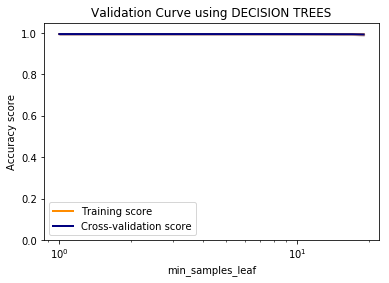

In [23]:
plot_validation_curve(bestEstimators[3], 
                      XTrain, yTrain, 
                      paramGridDT['min_samples_leaf'], 
                      'min_samples_leaf',
                      'Validation Curve using DECISION TREES',
                      myCV, 
                      0, 1.05)

In [29]:
display(results_df_gridsearch["Best estimator parameters"][3])

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1}

## 5. Fit the Best Models with XTrain, YTrain

In [38]:
fitModels = []

for model in bestEstimators:
    fitModel = model.fit(XTrain, yTrain)
    
    fitModels.append(fitModel)

C:\Users\Cristina\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


## 6. Evaluate the score on XTest prediction

In [39]:
yTrue = yTest

predictions = []

for fitModel in fitModels:
    yPred = fitModel.predict(XTest)
    
    predictions.append(list(yPred))

In [40]:
#Accuracy scores
accuracy_scores = []

i=0

for prediction in predictions:
    acc_score = accuracy_score(yTrue, prediction)
    accuracy_scores.append(acc_score)
    print(names[i])
    print(acc_score)
    print("\n")
    
    i = i+1

# Append XTest accuracy scores to results
j=0

for result in results:
    result["(XTest) acc score"] = accuracy_scores[j]
    j = j+1

results_df = pd.DataFrame(results)

LOGISTIC REGRESSION
0.9289256198347108


LINEAR DISCRIMINANT ANALYSIS
0.9289256198347108


K NEAREST NEIGHBORS
0.9933884297520661


DECISION TREE
0.9933884297520661


GAUSSIAN NAIVE BAYES
0.9289256198347108


SUPPORT VECTOR MACHINES
0.9933884297520661


MULTI-LAYER PERCEPTRON
0.9933884297520661


RANDOM FOREST
0.9933884297520661




## 7. CV with the complete dataset

In [41]:
# Cross-validation of the Best Estimator with the entire dataset
myStratifiedShuffleSplit = StratifiedShuffleSplit(100, 0.3, random_state = 42)

i=0

cv_scores = []

for model in fitModels:
    myCrosValScore = cross_val_score(model, X, y, cv = myStratifiedShuffleSplit)
    
    cv_scores.append(myCrosValScore)
    
    print(names[i])
    print ("Mean accuracy score: " + str(np.mean(myCrosValScore)))
    print ("Std deviation: " + str(np.std(myCrosValScore)) + "\n")
    
    i=i+1

# Append accuracy scores to the results
j=0
for result in results:
    result["(X,y) Mean acc score"] = np.mean(cv_scores[j])
    result["(X,y) Std acc score"] = np.std(cv_scores[j])
    j=j+1

LOGISTIC REGRESSION
Mean accuracy score: 0.9216942148760329
Std deviation: 0.006400958494921851



C:\Users\Cristina\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Cristina\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Cristina\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Cristina\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Cristina\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Cristina\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\U

C:\Users\Cristina\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Cristina\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Cristina\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Cristina\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Cristina\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Cristina\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\U

LINEAR DISCRIMINANT ANALYSIS
Mean accuracy score: 0.9216942148760329
Std deviation: 0.006400958494921851

K NEAREST NEIGHBORS
Mean accuracy score: 0.9892644628099175
Std deviation: 0.011150285690454674

DECISION TREE
Mean accuracy score: 0.9935619834710745
Std deviation: 0.0019567588327208396

GAUSSIAN NAIVE BAYES
Mean accuracy score: 0.9216942148760329
Std deviation: 0.006400958494921851

SUPPORT VECTOR MACHINES
Mean accuracy score: 0.9935619834710745
Std deviation: 0.0019567588327208396

MULTI-LAYER PERCEPTRON
Mean accuracy score: 0.9935619834710745
Std deviation: 0.0019567588327208396

RANDOM FOREST
Mean accuracy score: 0.9935619834710745
Std deviation: 0.0019567588327208396



- ### Summary of the results

In [ ]:
results_df = pd.DataFrame(results)

# Fucntions for stylying scores and std deviations
def highlight_max_score(data, color='lightgreen'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

def highlight_min_std(data, color = 'lightgreen'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_min = data == data.min()
        return [attr if v else '' for v in is_min]
    else:  # from .apply(axis=None)
        is_min = data == data.min().min()
        return pd.DataFrame(np.where(is_min, attr, ''),
                            index=data.index, columns=data.columns)
    
def highlight_min_score(data, color = 'lightsalmon'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_min = data == data.min()
        return [attr if v else '' for v in is_min]
    else:  # from .apply(axis=None)
        is_min = data == data.min().min()
        return pd.DataFrame(np.where(is_min, attr, ''),
                            index=data.index, columns=data.columns)
    
def highlight_max_std(data, color='lightsalmon'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

# Show columns in the desired order
results_df = results_df[['Model', 'Best estimator parameters', 
                         '(XTrain,yTrain) Mean test score', '(XTrain,yTrain) Std test score', 
                         '(XTrain,yTrain) Mean train score', '(XTrain,yTrain) Std train score', 
                         '(XTest) acc score',
                         '(X,y) Mean acc score', '(X,y) Std acc score']]


# Apply styles to the scores
style_max_scores = results_df.style.apply(highlight_max_score, subset=['(XTrain,yTrain) Mean test score',
                                                                       '(XTrain,yTrain) Mean train score',
                                                                       '(XTest) acc score',
                                                                       '(X,y) Mean acc score'
                                                                      ])


style_max_std = results_df.style.apply(highlight_min_std, subset=['(XTrain,yTrain) Std test score',
                                                               '(XTrain,yTrain) Std train score',
                                                               '(X,y) Std acc score'
                                                              ])

style_max_std.use(style_max_scores.export())

style_min_scores = results_df.style.apply(highlight_min_score, subset=['(XTrain,yTrain) Mean test score', 
                                                                '(XTrain,yTrain) Mean train score',
                                                                '(XTest) acc score',
                                                                '(X,y) Mean acc score'
                                                               ])

style_min_scores.use(style_max_std.export())

style_max_std = results_df.style.apply(highlight_max_std, subset=['(XTrain,yTrain) Std test score',
                                                               '(XTrain,yTrain) Std train score',
                                                               '(X,y) Std acc score'
                                                              ])

style_max_std.use(style_min_scores.export()).set_precision(2)

- ### Learning curves algorithms comparison

In [87]:
## Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

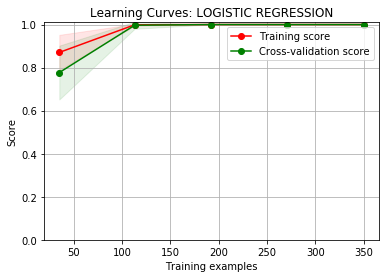

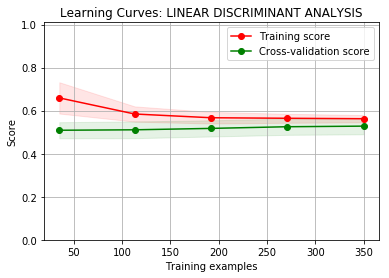

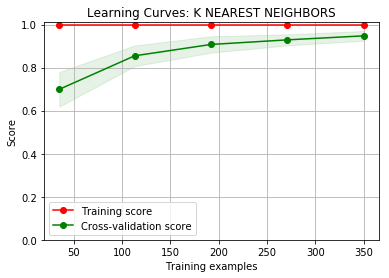

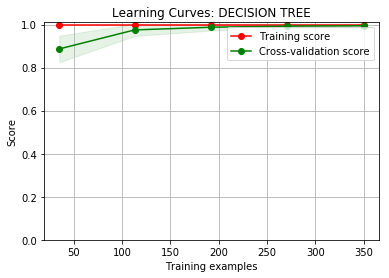

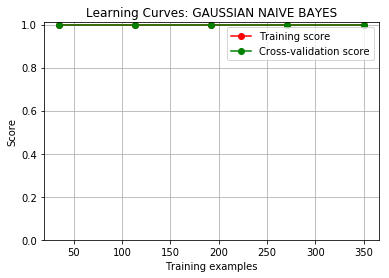

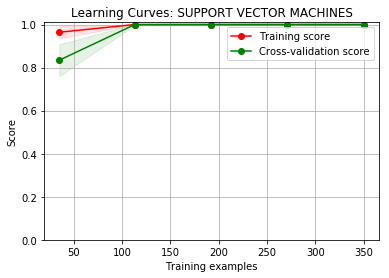

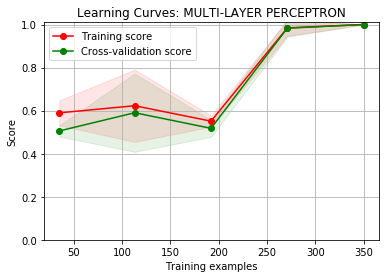

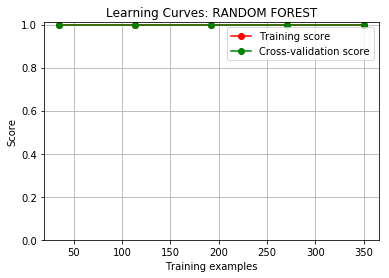

In [88]:
i=0
for model in fitModels:
    title = "Learning Curves: " + names[i]

    plot_learning_curve(model, title, X, y, ylim=(0, 1.01), cv=myStratifiedShuffleSplit, n_jobs=4)

    plt.show()
    i=i+1